In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize


### get_data

In [4]:
def get_data():
    """
    get random samples with 3 classes, N-class = 500
    """
    N_class = 500
    K = 3

    X1 = np.random.rand(N_class,2) + np.array([2,2])
    X2 = np.random.rand(N_class, 2) + np.array([-2,0])
    X3 = np.random.rand(N_class, 2) +np.array([0,4])
    X = np.vstack((X1,X2,X3))
    
    Y = np.array([0]*N_class+[1]*N_class+[2]*N_class)

    return X,Y

In [5]:
x,y = get_data()

In [10]:
y[499]

0

### spiral

In [44]:
def get_spiral():
    radius = np.linspace(1,10,100)
    theta = np.zeros((6,100))
    for i in range(6):
        start_angle = np.pi/3 * i
        end_angle = start_angle + np.pi/2
        tem = np.linspace(start_angle,end_angle,100)
        theta[i] = tem
    
    x1 = np.zeros((6,100))
    x2 = np.zeros((6,100))
    
    for i in range(6):
        x1[i] = radius * np.cos(theta[i])
        x2[i] = radius * np.sin(theta[i])
    
    X = np.zeros((600,2))
    X[:,0] = x1.flatten()
    X[:,1] = x2.flatten()
    
    X +=  np.random.rand(600,2)/5
    Y = np.array([0]*100+[1]*100+[0]*100+[1]*100+[0]*100+[1]*100)
#     Y = np.array([0,1]*300)
    
    return X, Y

In [45]:
x,y = get_spiral()

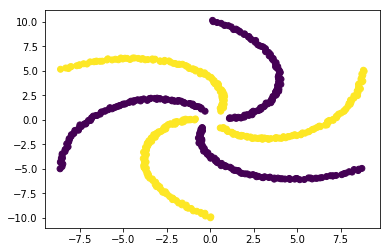

In [46]:
plt.scatter(x[:,0],x[:,1],c=y)

In [37]:
x,y = get_spiral()

### get transformed data

In [68]:
def get_transformed_digit():
    #import
    dt = pd.read_csv('digit.csv').as_matrix()
    np.random.shuffle(dt)
    X = dt[:,1:]
    Y = dt[:,0]
    
    #pca
    pca = PCA(n_components=100)
    pca.fit(X)
    Z = pca.transform(X)
    exp_sum = np.sum(pca.explained_variance_ratio_)
    
    #normalize
    z_mean = np.mean(Z,axis=0)
    z_std = np.std(Z, axis = 0)
    Z_normalized = (Z-z_mean)/z_std
    
    #split
    X_train = Z_normalized[:-300]
    Y_train = Y[:-300]
    X_test = Z_normalized[-300:]
    Y_test = Y[-300:]
    
    #return
    return X_train, Y_train, X_test, Y_test

### nn

In [92]:
def forward(x,w,b):
    a = x.dot(w) + b
    a_exp = np.exp(a)
    return a_exp/np.sum(a_exp,axis=1,keepdims=True)

In [99]:
def predict(y_matrix):
    """
    transform the fitted y_matrix to indicator vector
    """
    return np.argmax(y_matrix, axis=1)

In [102]:
def error_rate(y_matrix,target):
    y_vector = np.argmax(y_matrix,axis = 1)
    return np.mean(y_vector != target)

In [112]:
def cost(y_matrix,t_matrix):
    """
    here t is n*k matrix, not vector
    """
    tot = t_matrix*np.log(y_matrix)
    return -np.sum(tot)

In [129]:
def deri_w(t_matrix,y_matrix,x):
    return x.T.dot(t_matrix - y_matrix)

In [115]:
def deri_b(t_matrix,y_matrix):
    return np.sum(t_matrix - y_matrix, axis = 0)

In [127]:
def y2indicator(y_vector):
    """
    transform the vector y to matrix y
    """
    l = len(y_vector)
    indi = np.zeros((l,10))
    for i in range(l):
        indi[i,y_vector[i]] = 1
    return indi

In [133]:
def benchmark_full():
    """
    use util functions to run the logistic classification with bp
    """
    
    X_train, Y_train, X_test, Y_test = get_transformed_digit()
    
    N,D = X_train.shape
    yindi_train = y2indicator(Y_train)
    yindi_test = y2indicator(Y_test)
    
    M = yindi_test.shape[1]
    
    W = np.random.rand(D,M)
    b = np.random.rand(M)
    
    cost_train = []
    cost_test = []
    error_test = []
    
    eta = 1e-4
    penalty = 1e-2
    for i in range(10000):
        #train
        y_ma = forward(x=X_train,w=W,b=b)
        cost_tem = cost(y_matrix = y_ma,t_matrix = yindi_train)
        cost_train.append(cost_tem)
        
        #test
        y_test_ma = forward(x= X_test,w=W,b=b)
        cost_test_tem = cost(y_matrix = y_test_ma, t_matrix = yindi_test)
        cost_test.append(cost_test_tem)
        
        #error
        error_tem = error_rate(y_matrix = y_test_ma ,target = Y_test)
        error_test.append(error_tem)
        
        W += eta*(deri_w(t_matrix = yindi_train,y_matrix = y_ma,x = X_train) - penalty * W)
        b += eta*(deri_b(t_matrix = yindi_train,y_matrix = y_ma) - penalty * b)
        if i % 100 == 0:
            print("the error rate in "+str(i)+" iteration is : "+str(error_tem))
    
    #final
    y_final = forward(x = X_test, w=W,b=b)
    error_final = error_rate(y_matrix = y_final,target = Y_test)
    print("the final error rate is "+str(error_final))

In [134]:
benchmark_full()

the error rate in 0 iteration is : 0.8966666666666666
the error rate in 100 iteration is : 0.06
the error rate in 200 iteration is : 0.06666666666666667
the error rate in 300 iteration is : 0.06333333333333334
the error rate in 400 iteration is : 0.06333333333333334
the error rate in 500 iteration is : 0.06333333333333334
the error rate in 600 iteration is : 0.06666666666666667
the error rate in 700 iteration is : 0.07
the error rate in 800 iteration is : 0.07
the error rate in 900 iteration is : 0.07
the error rate in 1000 iteration is : 0.07
the error rate in 1100 iteration is : 0.07
the error rate in 1200 iteration is : 0.07
the error rate in 1300 iteration is : 0.07
the error rate in 1400 iteration is : 0.07
the error rate in 1500 iteration is : 0.07
the error rate in 1600 iteration is : 0.07
the error rate in 1700 iteration is : 0.07
the error rate in 1800 iteration is : 0.07333333333333333
the error rate in 1900 iteration is : 0.07333333333333333
the error rate in 2000 iteration 

KeyboardInterrupt: 

### mlp

In [3]:
def forward(x,w1,b1,w2,b2,method):
    if method == 'sigmoid':
        tem = x.dot(w1)+b1
        z = 1/(1+np.exp((-1)*tem))
    if method == 'relu':
        z = x.dot(w1) + b1
        z[z<0] = 0
    else:
        print("input the correct method")
        return None
    
    a = z.dot(w2) + b2
    expa = np.exp(a)
    y = expa/np.sum(expa,axis=1,keepdims=True)
    
    return y,z
    

In [4]:
from sklearn.utils import shuffle

In [18]:
a = np.array([[1,2,3],[2,1,3],[3,2,1]])
b = np.array([[1,2,3],[2,1,3],[3,2,1]])
ta,tb = shuffle(a,b)

In [19]:
ta

array([[1, 2, 3],
       [2, 1, 3],
       [3, 2, 1]])

In [20]:
tb

array([[1, 2, 3],
       [2, 1, 3],
       [3, 2, 1]])

In [22]:
a = 0

In [23]:
a + np.array([[1,2,3],[2,1,3]])

array([[1, 2, 3],
       [2, 1, 3]])